<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_3_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,95.831256,76.740634,67.142427,0.000303,249.714621,249.714457,0.000164
1,0.0,1.0,55.556122,79.641104,42.519508,0.000159,187.716893,187.716675,0.000218
2,0.0,2.0,58.713923,89.832002,28.209615,0.000887,186.756428,186.755308,0.001120
3,0.0,3.0,75.246624,22.526247,86.251181,0.005240,194.029292,194.024958,0.004334
4,0.0,4.0,64.877870,26.863787,72.400676,-0.001372,174.140961,174.143118,-0.002157
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,69.383747,31.069106,84.570778,-0.002082,195.021549,195.023617,-0.002068
249996,999.0,246.0,50.165471,36.485698,51.377161,-0.000567,148.027764,148.028700,-0.000937
249997,999.0,247.0,45.994661,37.050123,21.209148,-0.003796,114.250136,114.254505,-0.004369
249998,999.0,248.0,32.139556,82.958752,90.571173,0.000194,215.669676,215.669826,-0.000150


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    95.831256  76.740634  67.142427  ...  249.714621  249.714457  0.000164
      1.0    55.556122  79.641104  42.519508  ...  187.716893  187.716675  0.000218
      2.0    58.713923  89.832002  28.209615  ...  186.756428  186.755308  0.001120
      3.0    75.246624  22.526247  86.251181  ...  194.029292  194.024958  0.004334
      4.0    64.877870  26.863787  72.400676  ...  174.140961  174.143118 -0.002157
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  69.383747  31.069106  84.570778  ...  195.021549  195.023617 -0.002068
      246.0  50.165471  36.485698  51.377161  ...  148.027764  148.028700 -0.000937
      247.0  45.994661  37.050123  21.209148  ...  114.250136  114.254505 -0.004369
      248.0  32.139556  82.958752  90.571173  ...  215.669676  215.669826 -0.000150
      249.0  54.292877  40.101325  45.036176  ...  149.430245  149.430734 -0.000488

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    95.831256  76.740634  67.142427  ...  249.714621  249.714457  0.000164
      1.0    55.556122  79.641104  42.519508  ...  187.716893  187.716675  0.000218
      2.0    58.713923  89.832002  28.209615  ...  186.756428  186.755308  0.001120
      3.0    75.246624  22.526247  86.251181  ...  194.029292  194.024958  0.004334
      4.0    64.877870  26.863787  72.400676  ...  174.140961  174.143118 -0.002157
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  69.383747  31.069106  84.570778  ...  195.021549  195.023617 -0.002068
      246.0  50.165471  36.485698  51.377161  ...  148.027764  148.028700 -0.000937
      247.0  45.994661  37.050123  21.209148  ...  114.250136  114.254505 -0.004369
      248.0  32.139556  82.958752  90.571173  ...  215.669676  215.669826 -0.000150
      249.0  54.292877  40.101325  45.036176  ...  149.430245  149.430734 -0.000488

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,95.831256,76.740634,67.142427,0.000303,249.714621,249.714457,0.000164
1,0.0,1.0,55.556122,79.641104,42.519508,0.000159,187.716893,187.716675,0.000218
2,0.0,2.0,58.713923,89.832002,28.209615,0.000887,186.756428,186.755308,0.001120
3,0.0,3.0,75.246624,22.526247,86.251181,0.005240,194.029292,194.024958,0.004334
4,0.0,4.0,64.877870,26.863787,72.400676,-0.001372,174.140961,174.143118,-0.002157
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,69.383747,31.069106,84.570778,-0.002082,195.021549,195.023617,-0.002068
249996,999.0,246.0,50.165471,36.485698,51.377161,-0.000567,148.027764,148.028700,-0.000937
249997,999.0,247.0,45.994661,37.050123,21.209148,-0.003796,114.250136,114.254505,-0.004369
249998,999.0,248.0,32.139556,82.958752,90.571173,0.000194,215.669676,215.669826,-0.000150


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    95.831256  76.740634  67.142427  ...  249.714621  249.714457  0.000164
      1.0    55.556122  79.641104  42.519508  ...  187.716893  187.716675  0.000218
      2.0    58.713923  89.832002  28.209615  ...  186.756428  186.755308  0.001120
      3.0    75.246624  22.526247  86.251181  ...  194.029292  194.024958  0.004334
      4.0    64.877870  26.863787  72.400676  ...  174.140961  174.143118 -0.002157
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  69.383747  31.069106  84.570778  ...  195.021549  195.023617 -0.002068
      246.0  50.165471  36.485698  51.377161  ...  148.027764  148.028700 -0.000937
      247.0  45.994661  37.050123  21.209148  ...  114.250136  114.254505 -0.004369
      248.0  32.139556  82.958752  90.571173  ...  215.669676  215.669826 -0.000150
      249.0  54.292877  40.101325  45.036176  ...  149.430245  149.430734 -0.000488

[250000 rows x 7 columns]

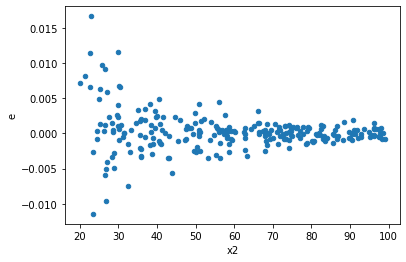

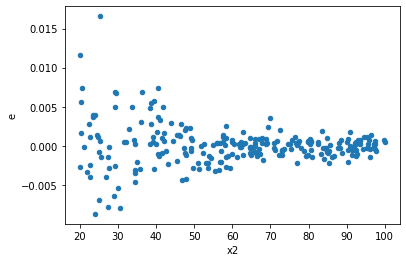

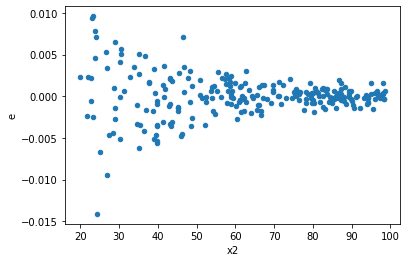

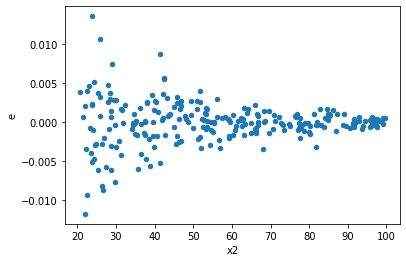

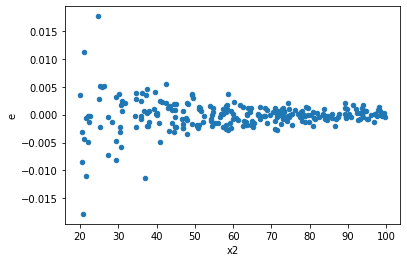

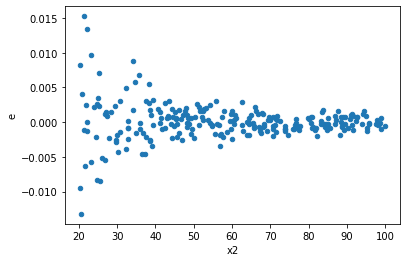

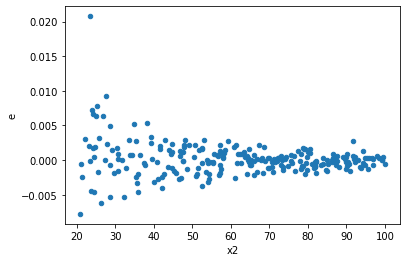

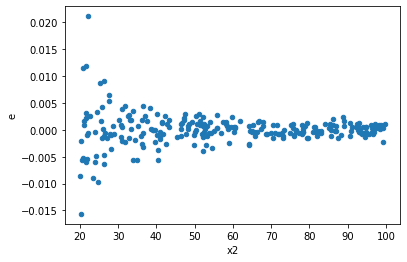

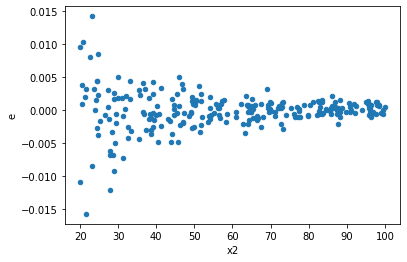

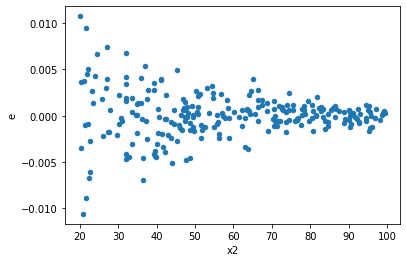

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,124.0,120.0,0.00016503623734473848,0.0016221843493267466,1.3309373979414393e-06,1.3518202911056221e-05,10.156903646982062,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
7.0,123.0,121.0,0.0007463615596389067,0.0007610365565504264,6.067980159665908e-06,6.289558318598565e-06,1.0365159662857,0.8437110767892224,0.5781444616053888,0.4218555383946112,Reject005=1 : Homoscedasticity
9.0,95.0,149.0,9.024251007792047e-05,0.0017490524144371075,9.499211587149523e-07,1.1738606808302735e-05,12.357453774566567,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
10.0,108.0,136.0,0.0006563104640929726,0.0011760893393010837,6.076948741601598e-06,8.647715730155028e-06,1.4230358191035022,0.05158637520239684,0.9742068123988016,0.02579318760119842,Reject005=1 : Homoscedasticity
11.0,138.0,106.0,0.0005385757391566159,0.0010769686014137137,3.90272274751171e-06,1.0160081145412393e-05,2.603331520767197,4.998250331400556e-07,0.9999997500874834,2.499125165700278e-07,Reject005=0 : Heteroscedasticity
12.0,114.0,130.0,0.0006265171389083744,0.0009857786598354485,5.495764376389249e-06,7.582912767964988e-06,1.3797739947772303,0.07560367722397321,0.9621981613880134,0.037801838611986605,Reject005=1 : Homoscedasticity
13.0,104.0,140.0,0.00010834976242330918,0.001768237049737322,1.0418246386856653e-06,1.2630264640980871e-05,12.123215531660717,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
14.0,128.0,116.0,0.0003464972339567792,0.0015806078361307167,2.7070096402873376e-06,1.3625929621816523e-05,5.033572625315878,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
15.0,119.0,125.0,0.0008033131603591836,0.0010159315161351332,6.75053075932087e-06,8.127452129081065e-06,1.2039723125265367,0.30570394471643425,0.8471480276417829,0.15285197235821713,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,119.0,125.0,0.001462936345042524,0.0009645291817900487,1.2293582731449782e-05,7.71623345432039e-06,0.6276635235536756,0.0108207596933032,Reject005=0 : Heteroscedasticity
1.0,124.0,120.0,0.00016503623734473848,0.0016221843493267466,1.3309373979414393e-06,1.3518202911056221e-05,10.156903646982062,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,131.0,113.0,0.002037538820013696,9.842645721458525e-05,1.5553731450486228e-05,8.710305948193385e-07,0.05600139089402299,2.175068689452595e-46,Reject005=0 : Heteroscedasticity
3.0,128.0,116.0,0.0014583322586404878,0.0005429903221853228,1.1393220770628811e-05,4.680951053321749e-06,0.4108540637945875,1.1957026894171673e-06,Reject005=0 : Heteroscedasticity
4.0,118.0,126.0,0.001315944521391885,0.00011478910398631042,1.1152072215185467e-05,9.110246348119875e-07,0.08169106308076723,7.387850512728187e-35,Reject005=0 : Heteroscedasticity
5.0,139.0,105.0,0.0016725752166306923,0.0004524550156997111,1.2032915227558937e-05,4.309095387616296e-06,0.35810901233204007,1.852170198534294e-08,Reject005=0 : Heteroscedasticity
6.0,126.0,118.0,0.0018916986292066924,0.00010194744758020916,1.5013481184180099e-05,8.639614201712641e-07,0.057545709057912,1.280936982697377e-44,Reject005=0 : Heteroscedasticity
7.0,123.0,121.0,0.0007463615596389067,0.0007610365565504264,6.067980159665908e-06,6.289558318598565e-06,1.0365159662857,0.8437110767892224,Reject005=1 : Homoscedasticity
8.0,122.0,122.0,0.0015445291332148996,0.00010060668700793838,1.266007486241721e-05,8.246449754749047e-07,0.06513744858831379,8.696311126861513e-41,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    696
Reject005=1 : Homoscedasticity      304
Name: Result_test, dtype: int64